In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'commodities_data.csv'

df = pd.read_csv(file_path)

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
class_counts = df.groupby('item.class')['item.id'].nunique()
df.info()
print(class_counts)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     int64         
 5   item.name   object        
 6   item.class  object        
 7   datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.8+ GB
item.class
Armor              11
Consumables      3201
Gems             1003
Glyphs            111
Miscellaneous    1979
Recipes             3
Trade Goods      2093
Unknown           701
Name: item.id, dtype: int64


,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00


In [6]:
# Replace 'Unknown' with NaN for item.name and item.class
df['item.name'] = df['item.name'].replace('Unknown', pd.NA)
df['item.class'] = df['item.class'].replace('Unknown', pd.NA)

total_items = len(df)

missing_name = len(df[df['item.name'].isna()])
missing_class = len(df[df['item.class'].isna()])
missing_both = len(df[df['item.name'].isna() & df['item.class'].isna()])

print(f"Total rows: {total_items:,}")
print(f"Rows missing name: {missing_name:,}")
print(f"Rows missing class: {missing_class:,}")
print(f"Rows missing both name and class: {missing_both:,}")

Total rows: 79,852,830
Rows missing name: 6,902
Rows missing class: 7,323,232
Rows missing both name and class: 6,902


In [7]:
# Drop rows where either 'item.name' or 'item.class' is NA
cleaned_df = df.dropna(subset=['item.name', 'item.class'])

Percentage of 'junk' items: 6.28%


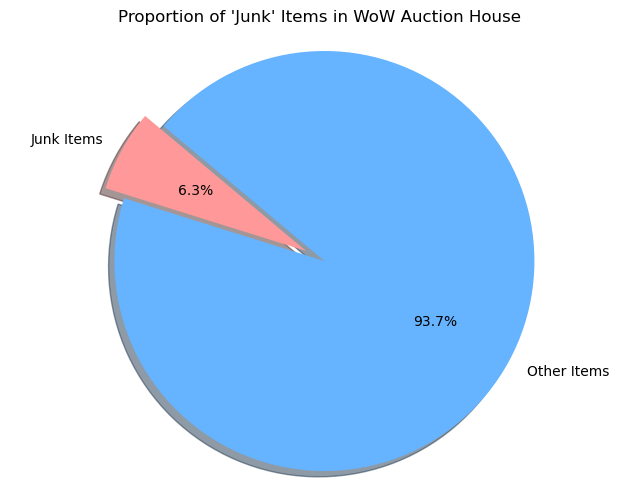

In [8]:
# set threshold for 'junk' items
high_quantity_threshold = cleaned_df['quantity'].quantile(0.75)  # top 25% of quantities
low_price_threshold = cleaned_df['unit_price'].quantile(0.25)  # bottom 25% of prices

junk_items_df = cleaned_df[(cleaned_df['quantity'] >= high_quantity_threshold) &
                           (cleaned_df['unit_price'] <= low_price_threshold)] # 'junk' items satisfy both conditions

total_items = len(cleaned_df)
junk_items_count = len(junk_items_df)
junk_percentage = (junk_items_count / total_items) * 100
print(f"Percentage of 'junk' items: {junk_percentage:.2f}%")

labels = ['Junk Items', 'Other Items']
sizes = [junk_items_count, total_items - junk_items_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')
plt.title("Proportion of 'Junk' Items in WoW Auction House")
plt.show()

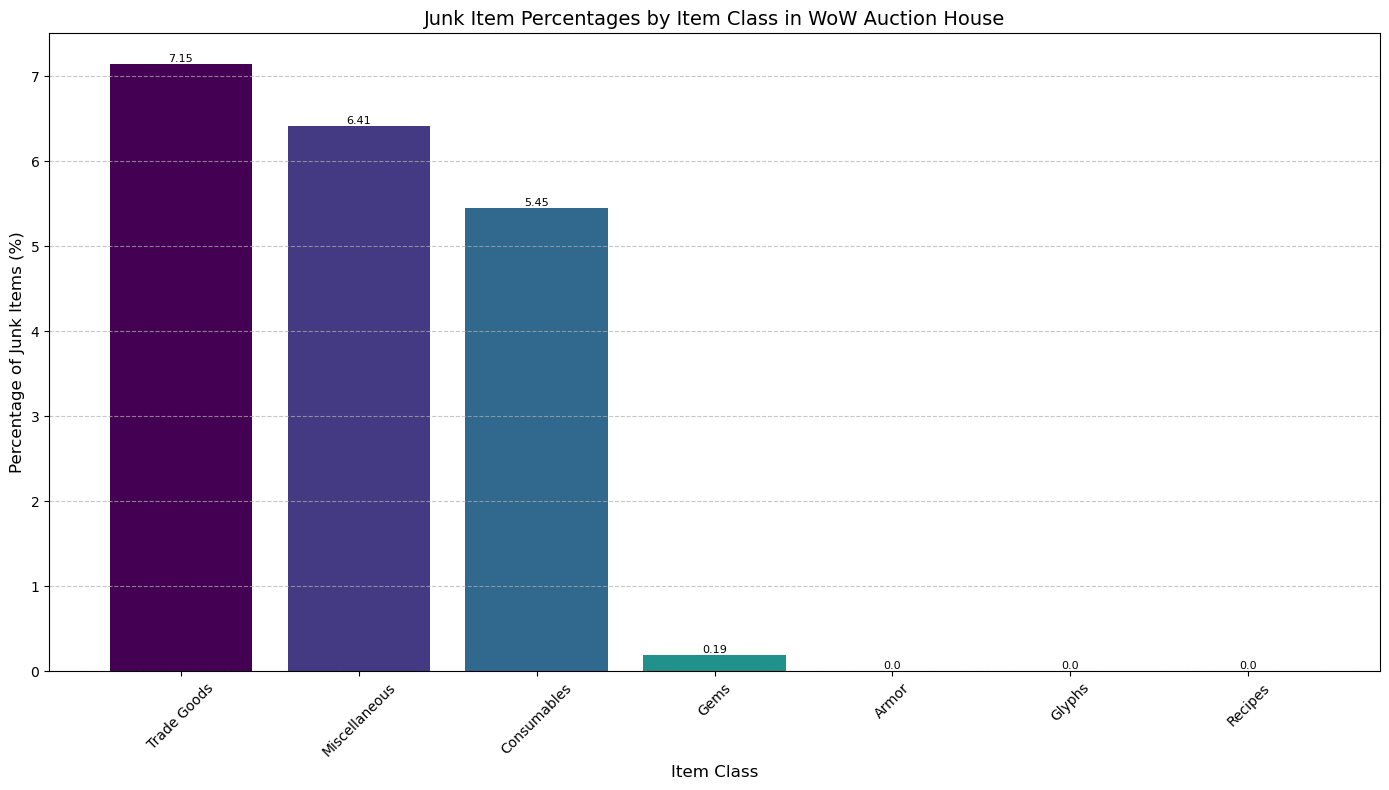

In [9]:
total_counts_by_class = cleaned_df.groupby('item.class').size()
junk_counts_by_class = junk_items_df.groupby('item.class').size()

junk_percentage_by_class = (junk_counts_by_class / total_counts_by_class) * 100

junk_percentage_by_class = junk_percentage_by_class.fillna(0)

sorted_junk_percentages = junk_percentage_by_class.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(sorted_junk_percentages.index, sorted_junk_percentages, color=plt.cm.viridis(np.linspace(0, 1, len(sorted_junk_percentages))))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=8)

plt.xlabel('Item Class', fontsize=12)
plt.ylabel('Percentage of Junk Items (%)', fontsize=12)
plt.title('Junk Item Percentages by Item Class in WoW Auction House', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [10]:
trade_goods_df = cleaned_df[cleaned_df['item.class'] == 'Trade Goods']


In [11]:
junk_in_trade_goods = trade_goods_df[(trade_goods_df['quantity'] >= high_quantity_threshold) & 
                                     (trade_goods_df['unit_price'] <= low_price_threshold)]


In [12]:
junk_item_names = junk_in_trade_goods['item.name'].unique()
print("Junk items in 'Trade Goods':", junk_item_names)


Junk items in 'Trade Goods': ['Tidespray Linen' 'Raw Seraphic Wing' 'Shadowy Shank' 'Fractured Glass'
 'Enormous Jawless Skulker' 'Enormous Fire Ammonite'
 'Big Fountain Goldfish' 'Fire Ammonite Tentacle' 'Ultramarine Pigment'
 'Acacia Powder' 'Shrouded Cloth' 'Simple Flour' 'Furious Crawdad'
 'Rough Grinding Stone' 'Cragscale' 'Phantasmal Haunch' 'Mild Spices'
 'Deeprock Salt' 'Iridescent Amberjack' 'Rich Grazer Milk'
 'Inconceivably Aged Vinegar' 'Medley of Transplanar Spices'
 'Crawler Claw' 'Enchanting Vellum' 'Mistscale' 'Three-Cheese Blend'
 'Porous Polishing Abrasive' 'Shaded Stone' 'Raw Beast Hide Scraps'
 'Briny Flesh' 'Choral Honey' 'Dragon Flank' 'Fiendish Leather'
 'Broken Frostweed Stem' 'Moist Fillet' 'Bolt of Mageweave' 'Soul Essence'
 'Silkweed' 'Ethereal Shard' 'Exotic Leather' 'Adamant Scales'
 'Blackrock Fragment' 'Gem Chip' 'Flaked Sea Salt' 'Muskenbutter'
 'Silkworm Pupa' 'Rubbery Flank' "Fool's Cap" 'Pocked Bonefish'
 'Durable Flux' 'Simple Wood' 'Pallid Bone' 'Po

In [13]:
junk_item_quantities = junk_in_trade_goods.groupby('item.name')['quantity'].sum()
sorted_junk_items = junk_item_quantities.sort_values(ascending=False)


In [14]:
top_n = 20
top_junk_items = sorted_junk_items.head(top_n)


In [15]:
total_junk_quantity = top_junk_items.sum()
top_junk_items_percentage = (top_junk_items / total_junk_quantity) * 100


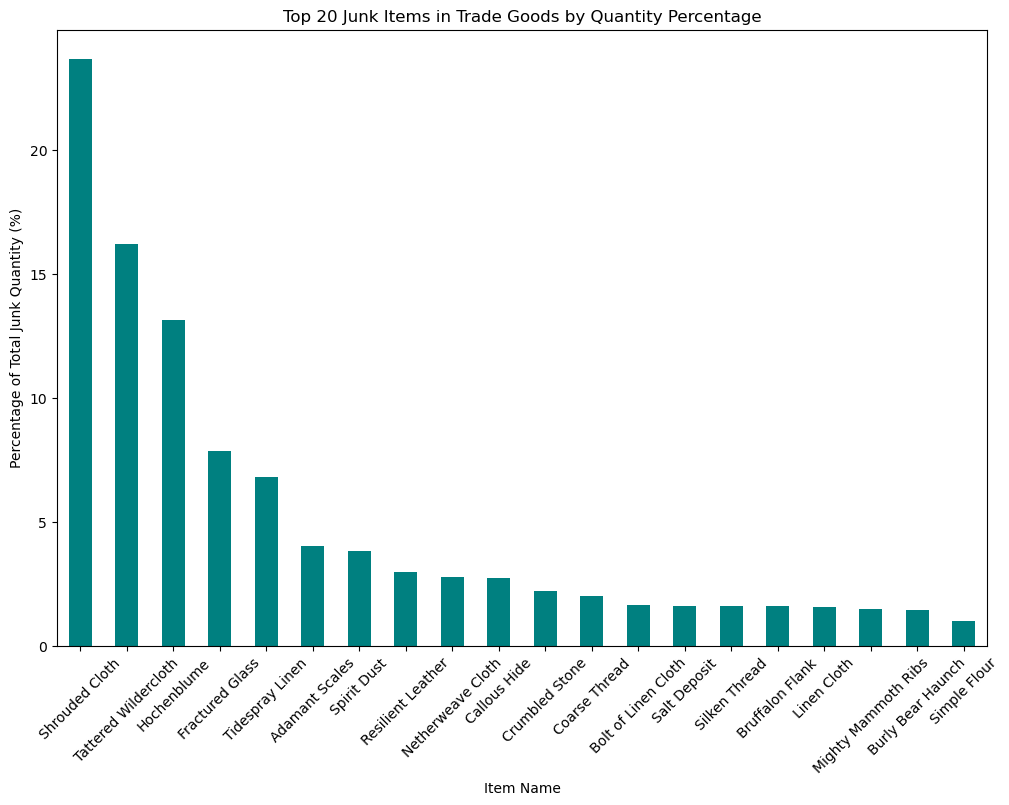

In [16]:
plt.figure(figsize=(12, 8))
top_junk_items_percentage.plot(kind='bar', color='teal')
plt.xlabel('Item Name')
plt.ylabel('Percentage of Total Junk Quantity (%)')
plt.title('Top 20 Junk Items in Trade Goods by Quantity Percentage')
plt.xticks(rotation=45)
plt.show()